# GeoPandas Tutorial (Basic to Intermediate)

This notebook introduces GeoPandas for spatial data analysis.

In [19]:
!pip install geopandas matplotlib contextily shapely pyproj fiona rtree

## Import Libraries

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

## Load Built-in Dataset

In [21]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.head()

import geopandas as gpd

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


## Plot Map

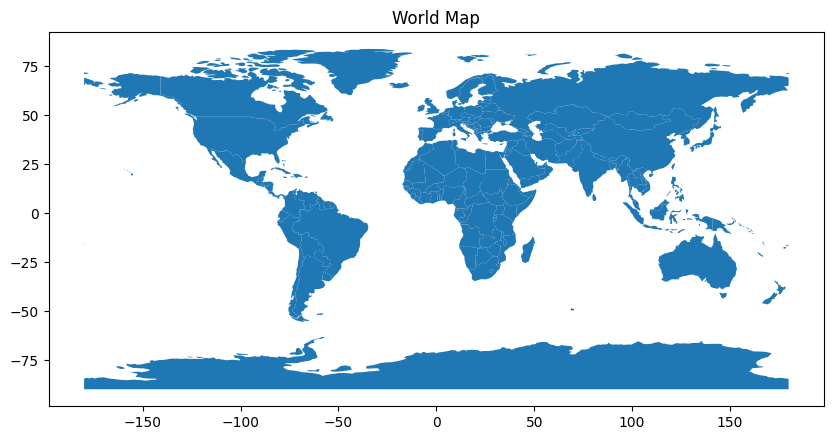

In [22]:
world.plot(figsize=(10,6))
plt.title('World Map')
plt.show()

## Filter Asian Countries

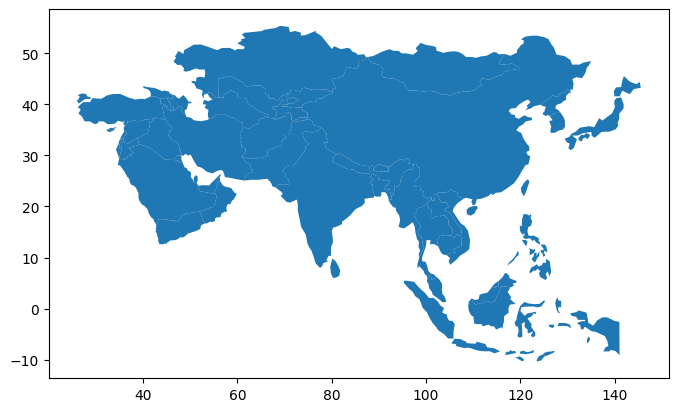

In [23]:
asia = world[world['CONTINENT'] == 'Asia']
asia.plot(figsize=(8,6))
plt.show()

## Create GeoDataFrame from Lat-Lon

In [27]:
data = pd.DataFrame({
    'City':['Delhi','Mumbai','Chennai'],
    'Lat':[28.61, 19.07, 13.08],
    'Lon':[77.23, 72.87, 80.27]
})

geometry = [Point(xy) for xy in zip(data.Lon, data.Lat)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')
gdf

,City,Lat,Lon,geometry
0,Delhi,28.61,77.23,POINT (77.23 28.61)
1,Mumbai,19.07,72.87,POINT (72.87 19.07)
2,Chennai,13.08,80.27,POINT (80.27 13.08)


## Spatial Join

In [25]:
joined = gpd.sjoin(gdf, world, predicate='within')
joined[['City','NAME']]

,City,NAME
0,Delhi,India
1,Mumbai,India
2,Chennai,India


## Buffer Analysis

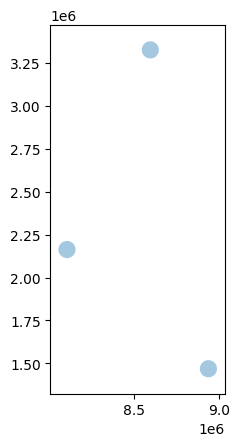

In [26]:
cities_proj = gdf.to_crs(epsg=3857)
cities_proj['buffer'] = cities_proj.buffer(50000)
cities_proj.set_geometry('buffer').plot(alpha=0.4)
plt.show()

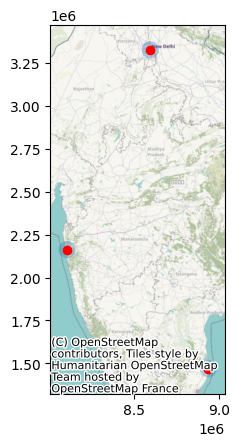

In [29]:
import contextily as ctx

ax = cities_proj.set_geometry('buffer').plot(alpha=0.3)

cities_proj.set_geometry('geometry').plot(ax=ax, color='red')

ctx.add_basemap(ax)

plt.show()